In [1]:
import pandas as pd

# read the dataframes
df_2017 = pd.read_csv('data/IPEDS_2017.csv')
df_2018 = pd.read_csv('data/IPEDS_2018.csv')
df_2019 = pd.read_csv('data/IPEDS_2019.csv')

# drop the unnecessary columns
df_2017.drop('Unnamed: 0', axis = 1, inplace = True)
df_2018.drop('Unnamed: 0', axis = 1, inplace = True)
df_2019.drop('Unnamed: 0', axis = 1, inplace = True)

# display 2017 for example
df_2017.head()

,UnitID,Name,Percent on any financial aid,Number in financial aid cohort,Average total grant aid,Percent of students awarded Pell grants,Total amount of Pell grant aid awarded,Average amount Pell grant aid awarded,Percent of students awarded federal student loans,Average amount of federal student loans awarded,...,SAT EBRW 25th percentile,SAT EBRW 75th percentile,SAT Math 25th percentile,SAT Math 75th percentile,ACT Composite 25th percentile,ACT Composite 75th percentile,ACT English 25th percentile,ACT English 75th percentile,ACT Math 25th percentile,ACT Math 75th percentile
0,222178,Abilene Christian University,97.0,3666.0,18914.0,27.0,4176566.0,4223.0,52.0,10767.0,...,510.0,620.0,515.0,600.0,21.0,26.0,20.0,26.0,20.0,26.0
1,138558,Abraham Baldwin Agricultural College,68.0,5140.0,4393.0,45.0,8978887.0,3857.0,38.0,5281.0,...,470.0,570.0,450.0,540.0,17.0,22.0,15.0,22.0,16.0,21.0
2,126182,Adams State University,75.0,1949.0,8361.0,48.0,4548663.0,4818.0,49.0,6918.0,...,430.0,540.0,450.0,540.0,17.0,22.0,15.0,22.0,16.0,22.0
3,188429,Adelphi University,87.0,5266.0,17920.0,32.0,7387255.0,4384.0,60.0,7188.0,...,530.0,620.0,530.0,620.0,22.0,27.0,21.0,27.0,21.0,27.0
4,168528,Adrian College,96.0,1670.0,24197.0,34.0,2472156.0,4375.0,76.0,6781.0,...,480.0,580.0,470.0,568.0,19.0,25.0,18.0,25.0,16.0,25.0


In [2]:
# encode the state column for each dataframe
df_2017 = pd.get_dummies(df_2017, columns = ['State'])
df_2018 = pd.get_dummies(df_2018, columns = ['State'])
df_2019 = pd.get_dummies(df_2019, columns = ['State'])
    

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import numpy as np

def df_rfreg(df, target_col, col_start, col_end = None, max_depth = 5, n_splits = 10):
    """ performs random forest regerssion on a dataframe
    
    Args:
        df (DataFrame): dataframe to do randomforest regression on
        target_col (str): column name of the target variable
        col_start (str): column to start at for initializing x variable
        col_end (str): column to end at for initializing x variable
        max_depth (int): max depth of random forest regressor
        n_splits (int): n_splits for cross validation on KFold
    
    Returns:
        y_pred (array): array of predictions calculated from random forest regressor
    """
    # get a dataframe without the target column
    df_x = df.drop(target_col, axis = 1)
    
    # initalize the x and y variables
    x = df_x.loc[:, col_start : col_end].values
    y = df.loc[:, target_col].values
    
    #initialize Random Forest Regressor and cross validation
    rf_reg = RandomForestRegressor(max_depth = max_depth)
    kfold = KFold(n_splits = n_splits)

    y_pred = np.empty_like(y)

    for train_idx, test_idx in kfold.split(x, y):
        # get training data
        x_train = x[train_idx, :]
        y_train = y[train_idx]

        # get test data
        x_test = x[test_idx, :]

        # fit data
        rf_reg = rf_reg.fit(x_train, y_train)

        # estimate on test data
        y_pred[test_idx] = rf_reg.predict(x_test)
        
    return y, y_pred, rf_reg

In [4]:
import matplotlib.pyplot as plt

def plot_feat_import(feat_list, feat_import, title, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value    
    """
    
    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
        
        
    if limit is not None:
        # limit to the first limit feature
        feat_list = feat_list[-limit:]
        feat_import = feat_import[-limit:]
    
    # plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.title(title)
    plt.xlabel('Mean decrease in R^2 across all Decision Trees')
    plt.show()

The r^2 of the 2017 model is: 0.7224568863258805


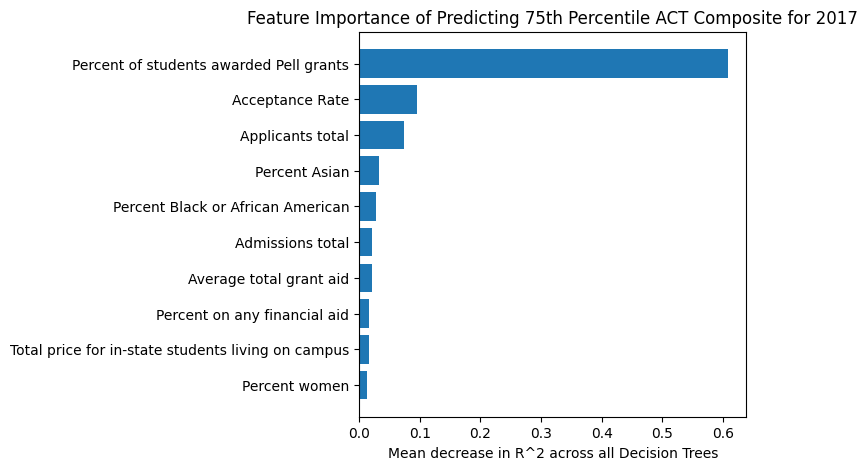

The r^2 of the 2018 model is: 0.7115838095574055


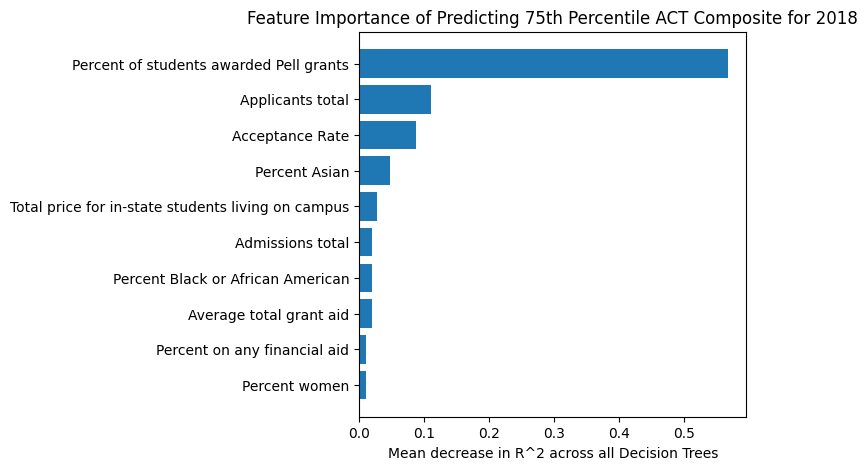

The r^2 of the 2019 model is: 0.7081271603612067


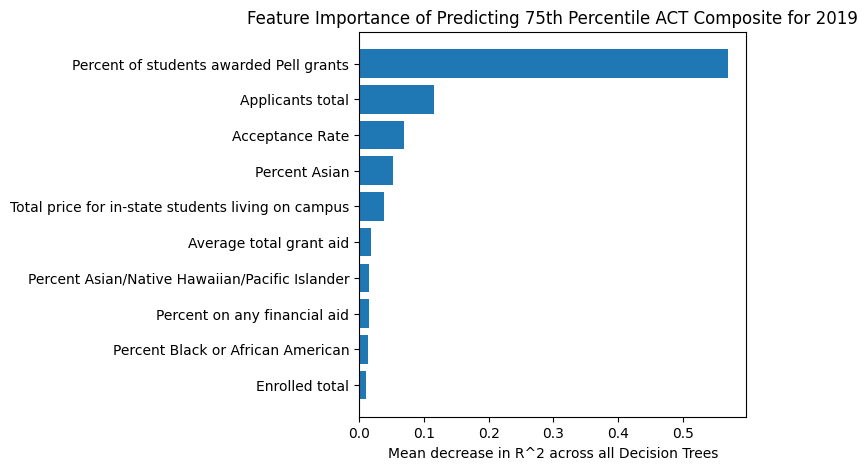

In [5]:
from sklearn.metrics import r2_score

years = ['2017', '2018', '2019']

# create a list of all the dataframes
dfs = [df_2017, df_2018, df_2019]

# for each year and dataframe perform a random forest regression and the r2 value
for year, df in zip(years, dfs):
    y, y_pred, rf_reg = df_rfreg(df, target_col = 'ACT Composite 75th percentile', col_start = 'Percent on any financial aid', 
                      col_end = 'Enrolled part time total')
    
    # get r^2 of model
    print(f'The r^2 of the {year} model is:', r2_score(y_true = y, y_pred = y_pred))
    
    
    # get the column names of the features
    x_feat_list = df.loc[:, 'Percent on any financial aid':'Enrolled part time total'].columns

    # plot the feature importances
    plot_feat_import(x_feat_list, rf_reg.feature_importances_, title = f'Feature Importance of Predicting 75th Percentile ACT Composite for {year}', 
                     limit = 10)

The r^2 of the 2017 model is: 0.3469285119588391


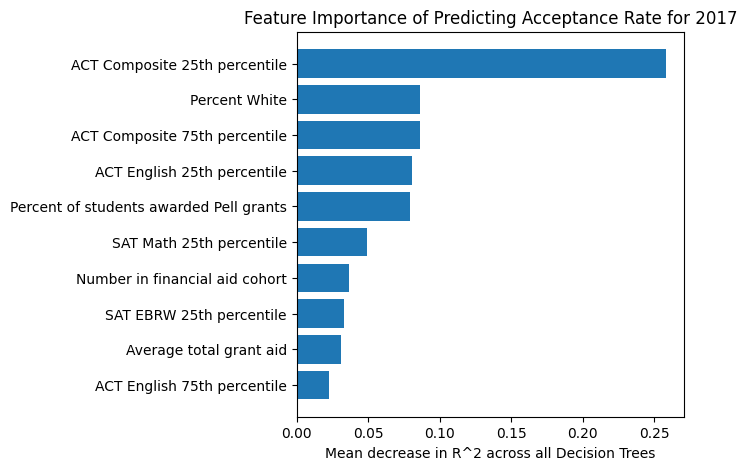

The r^2 of the 2018 model is: 0.3629190369513373


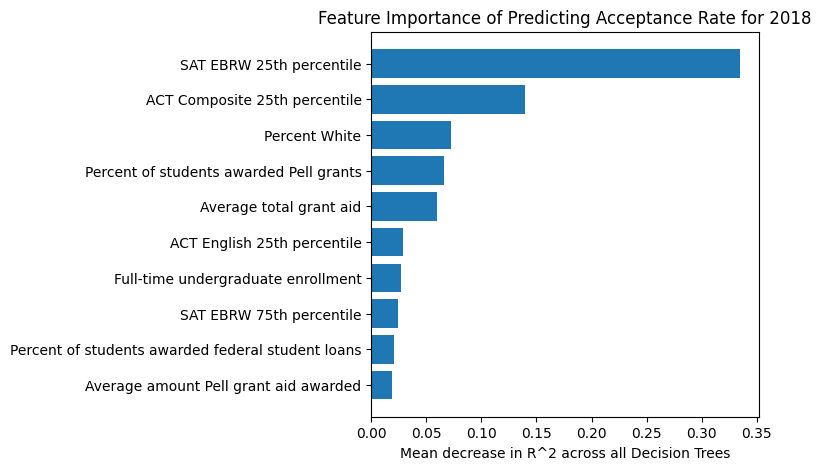

The r^2 of the 2019 model is: 0.3682452496700507


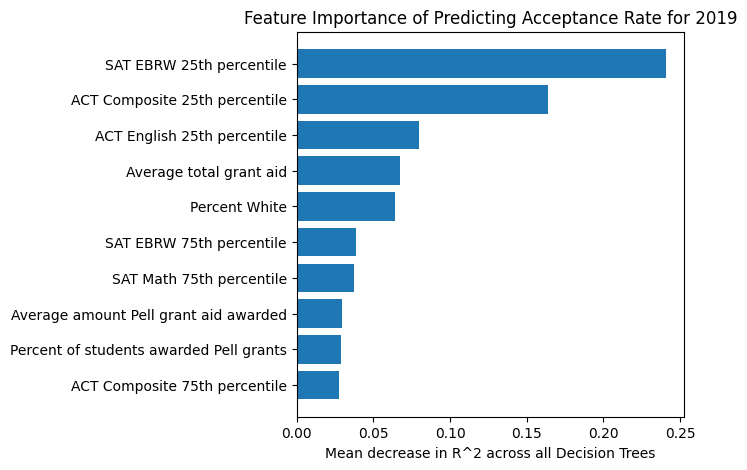

In [6]:
from sklearn.metrics import r2_score

years = ['2017', '2018', '2019']

# create a list of all the dataframes
dfs = [df_2017, df_2018, df_2019]

# for each year and dataframe perform a random forest regression and the r2 value
for year, df in zip(years, dfs):
    df = df.drop(['Applicants total', 'Admissions total', 'Enrolled total', 'Enrolled full time total', 
                  'Enrolled part time total'], axis = 1)
    
    y, y_pred, rf_reg = df_rfreg(df, target_col = 'Acceptance Rate', col_start = 'Percent on any financial aid', 
                      col_end = 'ACT Math 75th percentile')
    
    # get r^2 of model
    print(f'The r^2 of the {year} model is:', r2_score(y_true = y, y_pred = y_pred))
    
    # drop the target variable
    df = df.drop(['Acceptance Rate'], axis = 1)
    
    # get the column names of the features
    x_feat_list = df.loc[:, 'Percent on any financial aid':'ACT Math 75th percentile'].columns

    # plot the feature importances
    plot_feat_import(x_feat_list, rf_reg.feature_importances_, 
                     title = f'Feature Importance of Predicting Acceptance Rate for {year}', limit = 10)